# Exercise 04 - Verification
The assigment is due by Nov. 6, 2022 - 23:59

[Save as jupyter notebook or html, with your name in the filename, and upload on canvas]

## Exercise 1 - Analysis of point “forecast” of two temperature and wind observations
**Use:** https://colab.research.google.com/github/maltemuellerm/GEO4902/blob/main/04/Verification_Exercises.ipynb



The script loads the data of two insitu wind and temperature observations and the corresponding model forecast. Note the model temperatures are in Kelvin.


In [1]:
# import packages 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter
# import math
# from datetime import datetime,date
# import datetime
# import xarray as xr
# from math import sqrt

In [2]:
# import temperature and wind data
st1_temp = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99735temp.csv") #Edgeøya - Kapp Heuglin, Svalbard                
st2_temp = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99754temp.csv") #Hornsund, Svalbard
st1_wind = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99735wind.csv")                 
st2_wind = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99754wind.csv") 

# set time as index 
# drop=True: Delete columns to be used as the new index.
# inplace=True: If True, modifies the DataFrame in place (do not create a new object).
st1_temp.set_index('time', drop=True, inplace=True)
st2_temp.set_index('time', drop=True, inplace=True)
st1_wind.set_index('time', drop=True, inplace=True)
st2_wind.set_index('time', drop=True, inplace=True)



In [3]:
# transform model temperature from K to degC
st1_temp['model'] = st1_temp['model'] - 273.15
st2_temp['model'] = st2_temp['model'] - 273.15


**1. Plot as time series the model and observation together in one plot. (for both wind and temperature)**

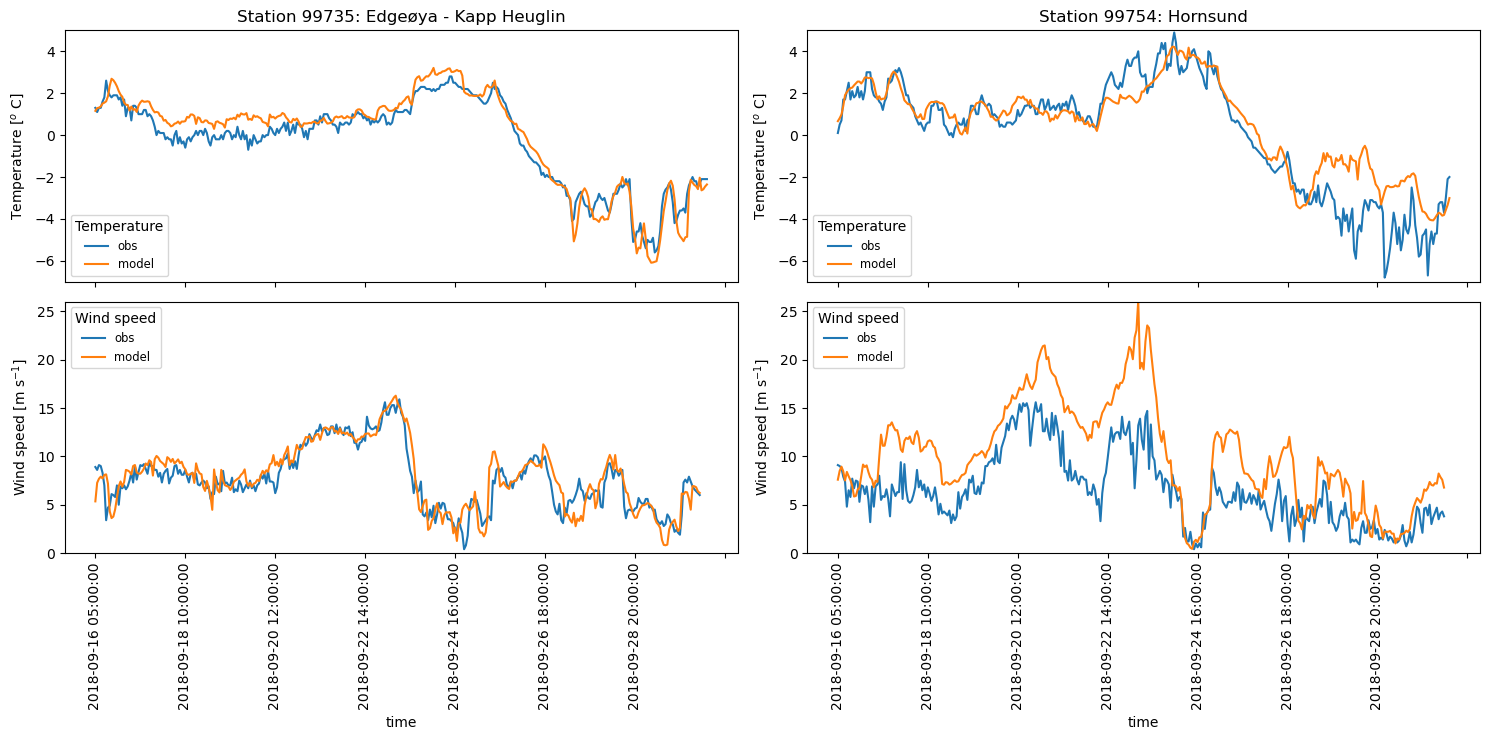

In [4]:
fig, axsm = plt.subplots(2,2, figsize=[15,7.5], sharex=True,
                         )
axs = axsm.flatten()

### temperature
# station 1
for k in st1_temp.keys():
  st1_temp[k].plot(ax = axs[0], label = k, title = 'Station 99735: Edgeøya - Kapp Heuglin', ylim = [-7,5])

# station 2
for k in st2_temp.keys():
  st2_temp[k].plot(ax = axs[1], label = k, title = 'Station 99754: Hornsund', ylim = [-7,5])

for i in range(2):
  axs[i].legend(loc="lower left", title="Temperature", fontsize='small', fancybox=True)
  axs[i].set_ylabel('Temperature [$^{o}$ C]')

### wind
# station 1
for k in st1_wind.keys():
  st1_wind[k].plot(ax = axs[2], label = k, ylim = [0,26])

# station 2
for k in st2_wind.keys():
  st2_wind[k].plot(ax = axs[3], label = k, ylim = [0,26])

for i in range(2, 4):
  axs[i].legend(loc="upper left", title="Wind speed", fontsize='small', fancybox=True)
  axs[i].set_ylabel('Wind speed [m s$^{-1}$]')
  axs[i].tick_params(axis='x', labelrotation=90);

plt.tight_layout();

**2. Can you find out if the errors are conditional or not? Describe for all four observations/models. (You can look in the lecture slides for more details on conditional errors.)**

In [5]:
def calc_regression(df, x, y, deg=1):
  d = np.polyfit(x, y, deg)
  f = np.poly1d(d)

  df.insert(2, 'Treg', f(x))
  return(df)

In [6]:
st1_temp = calc_regression(st1_temp, st1_temp['obs'].values, st1_temp['model'] - st1_temp['obs'], )
st2_temp = calc_regression(st2_temp, st2_temp['obs'].values, st2_temp['model'] - st2_temp['obs'], )


In [7]:
st1_wind = calc_regression(st1_wind, st1_wind['obs'].values, st1_wind['model'] - st1_wind['obs'], )
st2_wind = calc_regression(st2_wind, st2_wind['obs'].values, st2_wind['model'] - st2_wind['obs'], )


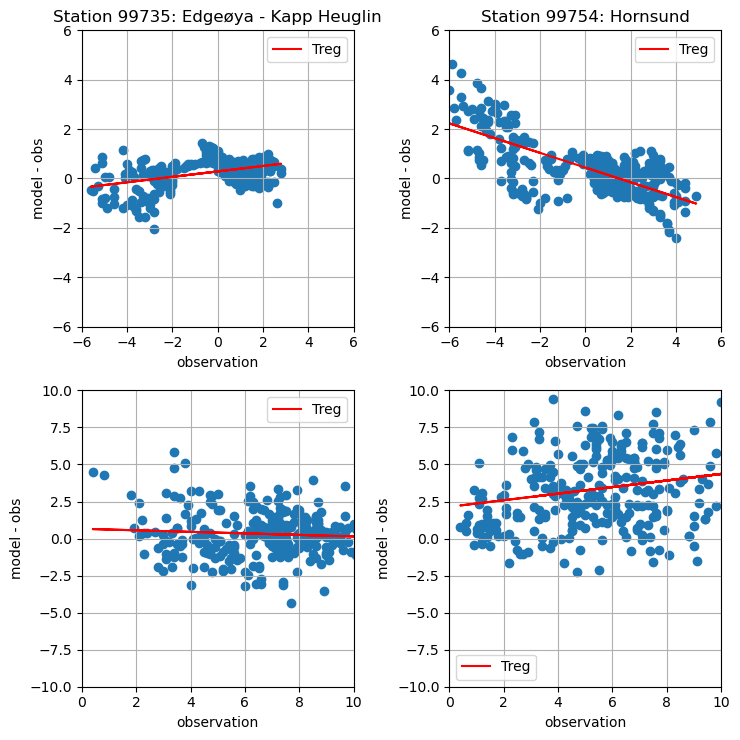

In [8]:
fig, axsm = plt.subplots(2,2, figsize=[7.5,7.5], #sharex=True,
                         )
axs = axsm.flatten()
# Temperature
axs[0].scatter(st1_temp['obs'].values, st1_temp['model'] - st1_temp['obs'], )
st1_temp.plot(x='obs' ,y='Treg',color='Red',ax=axs[0])
axs[0].set_title('Station 99735: Edgeøya - Kapp Heuglin')
axs[1].scatter(st2_temp['obs'].values, st2_temp['model'] - st2_temp['obs'], )
st2_temp.plot(x='obs' ,y='Treg',color='Red',ax=axs[1])
axs[1].set_title('Station 99754: Hornsund')

for i in range(2):
  axs[i].set_xlim([-6, 6])
  axs[i].set_ylim([-6, 6])
  axs[i].grid()
  axs[i].set_xlabel('observation')
  axs[i].set_ylabel('model - obs')

# Wind
axs[2].scatter(st1_wind['obs'].values, st1_wind['model'] - st1_wind['obs'], )
st1_wind.plot(x='obs' ,y='Treg',color='Red',ax=axs[2])
axs[3].scatter(st2_wind['obs'].values, st2_wind['model'] - st2_wind['obs'], )
st2_wind.plot(x='obs' ,y='Treg',color='Red',ax=axs[3])

for i in range(2,4):
  axs[i].set_xlim([0, 10])
  axs[i].set_ylim([-10, 10])
  axs[i].grid()
  axs[i].set_xlabel('observation')
  axs[i].set_ylabel('model - obs')

plt.tight_layout()

* st1: unconditional > errors are independently distributed
* st2_temp shows a conditional error: low temperatures > + bias
  * too warm for cold temperatures and too cold for warm temperatures
  * conditional bias: depends on the forecast conditions and the errors are not independently distributed 

**3. Calculate the bias and root mean square error (RMSE)**



In [9]:
# Bias
bias1_temp = (st1_temp['model'] - st1_temp['obs']).mean()
bias2_temp = (st2_temp['model'] - st2_temp['obs']).mean()

bias1_wind = (st1_wind['model'] - st1_wind['obs']).mean()
bias2_wind = (st2_wind['model'] - st2_wind['obs']).mean()

# RMSE
rmse1_temp = mean_squared_error(st1_temp['obs'], st1_temp['model'], squared=False) #If True returns MSE value, if False returns RMSE value.
rmse2_temp = mean_squared_error(st2_temp['obs'], st2_temp['model'], squared=False)

rmse1_wind = mean_squared_error(st1_wind['obs'], st1_wind['model'], squared=False)
rmse2_wind = mean_squared_error(st2_wind['obs'], st2_wind['model'], squared=False)



In [10]:
# print as nice table 
data = [['Kapp Heuglin temp', round(bias1_temp,2), round(rmse1_temp,2)],
        ['Hornsund temp', round(bias2_temp,2), round(rmse2_temp,2)],
        ['Kapp Heuglin wind', round(bias1_wind,2), round(rmse1_wind,2)],
        ['Hornsund wind', round(bias2_wind,2), round(rmse2_wind,2)]
        ]
pd.DataFrame(data, columns=["Variable","BIAS", "RMSE", ])



,Variable,BIAS,RMSE
0,Kapp Heuglin temp,0.25,0.62
1,Hornsund temp,0.40,1.19
2,Kapp Heuglin wind,0.26,1.47
3,Hornsund wind,3.59,4.58


**4. Remove the bias and compute the RMSE again.**

In [11]:
# RMSE without bias
rmse1_wo_temp = np.sqrt(mean_squared_error(st1_temp['obs'], (st1_temp['model'] - bias1_temp)))
rmse2_wo_temp = np.sqrt(mean_squared_error(st2_temp['obs'], (st2_temp['model'] - bias2_temp)))

rmse1_wo_wind = np.sqrt(mean_squared_error(st1_wind['obs'], (st1_wind['model'] - bias1_wind)))
rmse2_wo_wind = np.sqrt(mean_squared_error(st2_wind['obs'], (st2_wind['model'] - bias2_wind)))


# print as nice table 
data = [['Kapp Heuglin temp', round(bias1_temp,2), round(rmse1_temp,2), round(rmse1_wo_temp,2)],
        ['Hornsund temp', round(bias2_temp,2), round(rmse2_temp,2), round(rmse2_wo_temp,2)],
        ['Kapp Heuglin wind', round(bias1_wind,2), round(rmse1_wind,2), round(rmse1_wo_wind,2)],
        ['Hornsund wind', round(bias2_wind,2), round(rmse2_wind,2), round(rmse2_wo_wind,2)]
        ]
pd.DataFrame(data, columns=["Variable","BIAS", "RMSE", "RMSE without BIAS"])


,Variable,BIAS,RMSE,RMSE without BIAS
0,Kapp Heuglin temp,0.25,0.62,0.56
1,Hornsund temp,0.40,1.19,1.12
2,Kapp Heuglin wind,0.26,1.47,1.45
3,Hornsund wind,3.59,4.58,2.85


**5. Smooth the time series of the de-biased wind observations. e.g., with**
```
from scipy.signal import savgol_filter
result = savgol_filter(st2_wind.model, 25, 2)
result = savgol_filter(st2_wind.model-bias2_w, 25, 1)
```

In [28]:
st1_windsmooth = pd.Series(savgol_filter(st1_wind['model']-bias1_wind, 25, 1)).set_axis(st1_wind.index)  # the .set_axis() will define the index for the pandas Series
st2_windsmooth = pd.Series(savgol_filter(st2_wind['model']-bias2_wind, 25, 1)).set_axis(st2_wind.index)


**6. Plot the time series for observations and smoothed and de-biased models.**

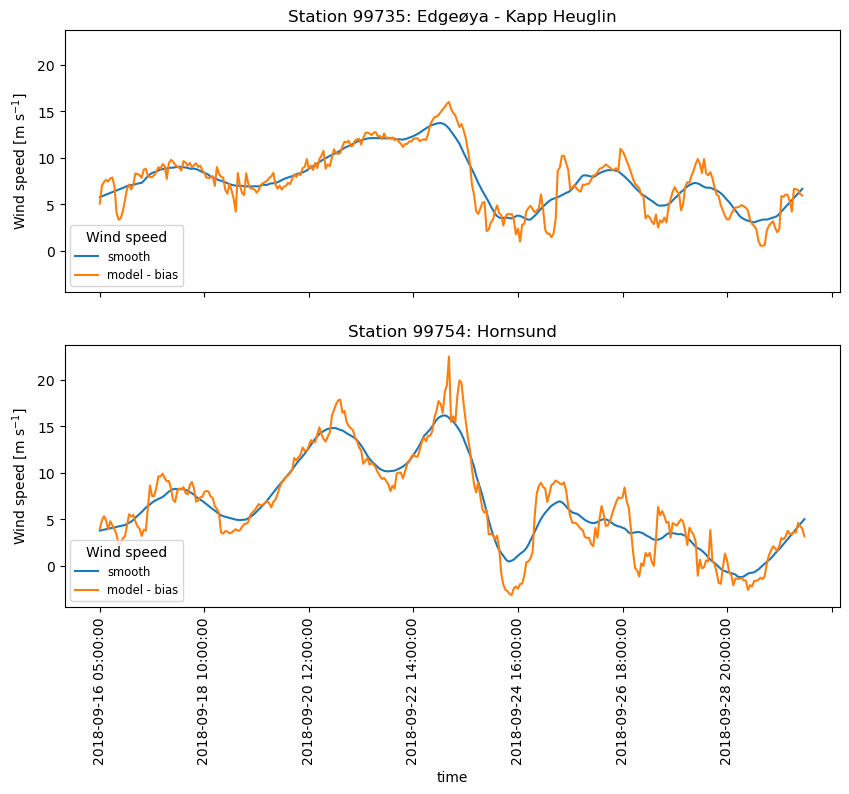

In [29]:
fig, axsm = plt.subplots(2,1, figsize=[10,7.5], sharex=True, sharey = True
                         )
axs = axsm.flatten()
st1_windsmooth.plot(ax = axs[0], label = 'smooth', title = 'Station 99735: Edgeøya - Kapp Heuglin')
(st1_wind['model'] - bias1_wind).plot(ax = axs[0], label = 'model - bias', )

st2_windsmooth.plot(ax = axs[1], label = 'smooth', title = 'Station 99754: Hornsund')
(st2_wind['model'] - bias2_wind).plot(ax = axs[1], label = 'model - bias', )

for i in range(len(axs)):
  axs[i].tick_params(axis='x', labelrotation=90)
  axs[i].set_ylabel('Wind speed [m s$^{-1}$]')
  axs[i].legend(loc="lower left", title="Wind speed", fontsize='small', fancybox=True)

Removing the bias > smoothed curved and the observations have a higher correlation than the previous figure

**Recalculate the RMSE values. What changed?**


In [30]:
rmse1_smooth_wind = np.sqrt(mean_squared_error(st1_wind['obs'], st1_windsmooth))
rmse2_smooth_wind = np.sqrt(mean_squared_error(st2_wind['obs'], st2_windsmooth))


In [31]:
# print as nice table 
data = [['Kapp Heuglin temp', round(bias1_temp,2), round(rmse1_temp,2), round(rmse1_wo_temp,2), ],
        ['Hornsund temp', round(bias2_temp,2), round(rmse2_temp,2), round(rmse2_wo_temp,2), ],
        ['Kapp Heuglin wind', round(bias1_wind,2), round(rmse1_wind,2), round(rmse1_wo_wind,2), round(rmse1_smooth_wind,2)],
        ['Hornsund wind', round(bias2_wind,2), round(rmse2_wind,2), round(rmse2_wo_wind,2), round(rmse2_smooth_wind,2)]
        ]
pd.DataFrame(data, columns=["Variable","BIAS", "RMSE", "RMSE without BIAS", "RMSE smooth"])



,Variable,BIAS,RMSE,RMSE without BIAS,RMSE smooth
0,Kapp Heuglin temp,0.25,0.62,0.56,NaN
1,Hornsund temp,0.40,1.19,1.12,NaN
2,Kapp Heuglin wind,0.26,1.47,1.45,1.27
3,Hornsund wind,3.59,4.58,2.85,2.24


Based on this result, why can a coarser resolution model have a lower rmse, although it is not necessarily more “accurate”?

* RMSE smooth much lower than both, RMSE and RMSE without BIAS
* when smoothing, the forecast bias has been removed > understimation of the forecast variablitity (similar to using a coarser resolution model)
* smoothing the forecast will lead to lower RMSE > lower resolution models will tend to have a better RMSE as they smooth out 'extremes'
  * coarser resolution in models will act as a filter, removing small scale atmospheric interactions compared to higher resolution models
  * when comparing models they have to have the same resolution when RMSEs are compared



## Exercise 2
**Categorical verification**:  John Finley computed tornado forecasts for the United States for eighteen regions east of the Rocky Mountains. Finley provided the following contingency table for forecasts of tornados (Finley 1884):

![](/home/franzihe/Documents/Python/GEO4902_exercises/EX4_Fig1.png)

**1. Compute the _fraction correct_, _frequency bias_, _probability of detection_, _threat score_, and _equitable threat score_. For each score, write a sentence or two how this value can be interpreted.**

$$\text{fraction correct} = \frac{\text{hits} + \text{correct negatives}}{\text{total}}$$
$$\text{frequency bias} = \frac{\text{hits} + \text{false alarms}}{\text{hits} + \text{misses}}$$
$$\text{probability of detection} = \frac{\text{hits}}{\text{hits}+\text{misses}}$$
$$\text{threat score} = \frac{\text{hits}}{\text{hits} + \text{misses} + \text{false alarm}} $$
$$\text{equitable threat score} = \frac{\text{hits} - \text{hits}_{randome}}{\text{hits} + \text{misses} + \text{false alarm} - \text{hits}_{randome}}$$

$$\text{hits}_{randome} = \frac{(\text{hits} + \text{misses}) (\text{hits} + \text{false alarm})}{\text{total}} = \frac{\text{observed yes}}{\text{total}} \cdot \frac{\text{forecasted yes}}{\text{total}} $$



|              |  yes         | no                |  Total        |
|-------------:|:------------:|:-----------------:|:-------------:|
| Forecast yes | hits         | false alarms      | forecast yes  |
| Forecast no  | misses       | correct negatives | forecast no   |
| Total        | observed yes | observed no       | total         |

Outcomes of the contingency table:
_hit_ or _correct negative_ $\rightarrow$ the forecast is correct
_false alarm_ or _miss_ $\rightarrow$ the forecast is incorrect

In [16]:
hits = 28;          false_alarms = 72;           forecast_yes = hits + false_alarms
misses = 23;        correct_negatives = 2680;   forecast_no = misses + correct_negatives
observed_yes = hits+misses;  observed_no = false_alarms+correct_negatives;   total = forecast_yes + forecast_no
data = [[hits, false_alarms, forecast_yes],
        [misses, correct_negatives, forecast_no],
        [observed_yes, observed_no, total]]
C_table = pd.DataFrame(data, columns=["yes","no", "Total"], index=["Forecast yes", "Forecast no", "Total"])
C_table

,yes,no,Total
Forecast yes,28,72,100
Forecast no,23,2680,2703
Total,51,2752,2803


In [17]:
fraction_correct = (hits + correct_negatives) / total
frequency_bias   = (hits + false_alarms) / (hits + misses)
probability_detection = hits / (hits + misses)
threat_score     = hits / (hits + misses + false_alarms)
hits_rnd         = ((hits + misses)*(hits + false_alarms)) / total
equitable_th_score = (hits - hits_rnd) / (hits + misses + false_alarms + hits_rnd)


data = [['fraction correct', round(fraction_correct,2) ],
        ['frequency bias', round(frequency_bias,2)],
        ['probability of detection', round(probability_detection,2)],
        ['threat score', round(threat_score,2)],
        ['equitable threat score', round(equitable_th_score,2)]
        ]
pd.DataFrame(data, columns=["Categorial forecast verification","value", ])

,Categorial forecast verification,value
0,fraction correct,0.97
1,frequency bias,1.96
2,probability of detection,0.55
3,threat score,0.23
4,equitable threat score,0.21


* Fraction correct: (Perfect score = 1) 
  * heavily influenced by "no event" in case of rare weather.
  * **0.97 indicating that 97% of all forecasts were correct.**
* Frequency bias: (Perfect score = 1)
  * Measures the ratio of the frequency of forecast events to the frequency of observed events. 
  * Indicates wheater the forecast system has a tendency to **underforecast (_BIAS_ < 1)** or **overforecast (_BIAS_ > 1)** events.
  * Does not measure how well the forecast corresponds to the observations, only measures relative frequencies.
  * **1.96 indicating twice overforecasting of tornado frequency.**
* Probability of detection: (Perfect score = 1)
  * Probability of of an event being forecasted.
  * Sensitive to hits, but ignores false alarms. 
  * Very sensitive to the climatological frequency of the event.
  * Good for rare events.
  * Can be artificially improved by issuing more "yes" forecasts to increase the number of hits.
  * **0.55 indicating that about half of the observed tornado events were correctly predicted**
* Threat score: (0 indicates no skill. Perfect score = 1)
  * Measures the fraction of observed and/or forecast events that were correctly predicted.
  * It can be thought of as the accuracy when correct negatives have been removed from consideration, that is, TS is only concerned with forecasts that count.
  * Sensitive to hits, penalizes both misses and false alarms.
  * Depends on climatological frequency of events (poorer scores for rarer events) since some hits can occur purely due to random chance. 
  * **0.23 meaning that about a quarter of the tornado events (observed and/or predicted) were correctly forecasted.**
* Equitable threat score: (0 indicates no skill. Perfect score = 1)
  * Measures the fraction of observed and/or forecast events that were correctly predicted.
  * Adjusted for hits associated with random chance (for example, it is easier to correctly forecast rain occurrence in a wet climate than in a dry climate).
  * The ETS is often used in the verification of rainfall in NWP models because its "equitability" allows scores to be compared more fairly across different regimes.
  * Sensitive to hits as it penalises both misses and false alarms in the same way.
  * It does not distinguish the source of forecast error. 
  * **0.21 is lower than threat score (0.23)**

https://cawcr.gov.au/projects/verification/

**2. It was pointed out by _Gilbert (1884)_ that the _fraction correct score_ can be manipulated if just “no tornado” is forecasted. Provide the contingency table for this situation and calculate the fraction correct score to verify Gilberts’s critique.**


|              |  yes         | no                |  Total        |
|-------------:|:------------:|:-----------------:|:-------------:|
| Forecast yes | 0            | 0                 | 0             |
| Forecast no  | 23 + 28      | 2680 + 72         | 2803          |
| Total        | 51           | 2752              | 2803          |


**3. The results of Gilbert led to the development of more meaningful verification scores. And the _Equitable threat score_ is also called the _Gilbert skill score_. What is the ETS in case of the manipulated contingency table?**

In [18]:
hits = 0;          false_alarms = 0;           forecast_yes = hits + false_alarms
misses = 23+28;    correct_negatives = 2680+72;forecast_no = misses + correct_negatives
observed_yes = hits+misses;  observed_no = false_alarms+correct_negatives;   total = forecast_yes + forecast_no

In [19]:
fraction_correct = (hits + correct_negatives) / total
frequency_bias   = (hits + false_alarms) / (hits + misses)
probability_detection = hits / (hits + misses)
threat_score     = hits / (hits + misses + false_alarms)
hits_rnd         = ((hits + misses)*(hits + false_alarms)) / total
equitable_th_score = (hits - hits_rnd) / (hits + misses + false_alarms + hits_rnd)


data = [['fraction correct', round(fraction_correct,2) ],
        ['frequency bias', frequency_bias],
        ['probability of detection', probability_detection],
        ['threat score', threat_score],
        ['equitable threat score', equitable_th_score]
        ]
pd.DataFrame(data, columns=["Categorial forecast verification","value", ])

,Categorial forecast verification,value
0,fraction correct,0.98
1,frequency bias,0.00
2,probability of detection,0.00
3,threat score,0.00
4,equitable threat score,0.00
